# Machine Learning for data engineering 

Importation of the dataset :

Chargement des images organiques...
Chargement des images recyclables...
Nombre total d'images : 2513
Dimensions des images : (128, 128, 3)
Nombre d'étiquettes organiques : 1401
Nombre d'étiquettes recyclables : 1112
Taille de l'ensemble d'entraînement : 2010
Taille de l'ensemble de test : 503
Visualisation de quelques exemples...


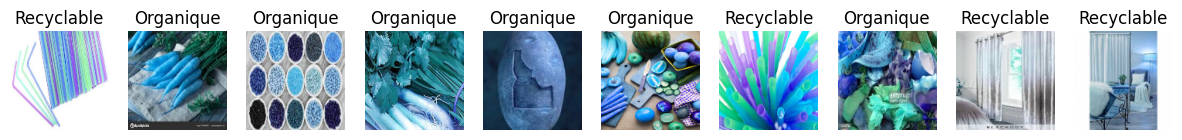

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split


path_organique = r'Kaggle-Waste-Classification-Dataset\DATASET\DATASET\TEST\O'
path_recyclable = r'Kaggle-Waste-Classification-Dataset\DATASET\DATASET\TEST\R'


image_size = (128, 128)  # Taille standard pour toutes les images
data = []  # Liste pour stocker les données
labels = []  # Liste pour stocker les étiquettes (0 = Organique, 1 = Recyclable)

# Fonction pour charger les images
def load_images_from_folder(folder_path, label):
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        if os.path.isfile(img_path):
            # Charger l'image
            img = cv2.imread(img_path)
            if img is not None:
                # Redimensionner l'image
                img = cv2.resize(img, image_size)
                # Ajouter aux données
                data.append(img)
                labels.append(label)

# Charger les images des deux dossiers
print("Chargement des images organiques...")
load_images_from_folder(path_organique, label=0)  # Organique = 0
print("Chargement des images recyclables...")
load_images_from_folder(path_recyclable, label=1)  # Recyclable = 1

# Convertir en tableaux numpy
data = np.array(data)
labels = np.array(labels)

# Normaliser les images (valeurs entre 0 et 1)
data = data / 255.0

# Afficher des informations sur les données
print(f"Nombre total d'images : {len(data)}")
print(f"Dimensions des images : {data.shape[1:]}")
print(f"Nombre d'étiquettes organiques : {np.sum(labels == 0)}")
print(f"Nombre d'étiquettes recyclables : {np.sum(labels == 1)}")

# Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42, stratify=labels)

print(f"Taille de l'ensemble d'entraînement : {len(X_train)}")
print(f"Taille de l'ensemble de test : {len(X_test)}")

# Visualisation de quelques images avec leurs étiquettes
def visualize_images(images, labels, num=10):
    plt.figure(figsize=(15, 5))
    for i in range(num):
        idx = np.random.randint(0, len(images))
        plt.subplot(1, num, i + 1)
        plt.imshow(images[idx])
        plt.title("Recyclable" if labels[idx] == 1 else "Organique")
        plt.axis("off")
    plt.show()

print("Visualisation de quelques exemples...")
visualize_images(X_train, y_train)


In [2]:
import pandas as pd

# Chemin vers le fichier CSV
ademe_file = r'ADEME\longue-vie-aux-objets-acteurs-de-leconomie-circulaire.csv'

# Charger le dataset
ademe_data = pd.read_csv(ademe_file)

# Afficher les premières lignes pour explorer le contenu
print("Aperçu des données ADEME :")
print(ademe_data.head())

# Vérifier les colonnes
print("\nColonnes disponibles :")
print(ademe_data.columns)

# Nettoyage des données
# Supprimer les colonnes inutiles (ajuster selon vos besoins)
ademe_data_cleaned = ademe_data.drop(columns=['Identifiant', 'Paternité', 'SIREN', 'SIRET', 
                                              'Téléphone', 'Complément d\'adresse', 'Date de dernière modification'])

# Supprimer les lignes avec des valeurs manquantes importantes
ademe_data_cleaned = ademe_data_cleaned.dropna(subset=['Nom', 'Code postal', 'Ville', 'latitude', 'longitude'])

# Afficher un résumé des données nettoyées
print("\nRésumé des données nettoyées :")
print(ademe_data_cleaned.info())

# Enregistrer les données nettoyées pour une utilisation ultérieure
ademe_data_cleaned.to_csv(r'ADEME\ademe_cleaned.csv', index=False)

# Visualisation rapide des données par service proposé
service_counts = ademe_data_cleaned['Type de services'].value_counts()
print("\nNombre d'acteurs par type de service :")
print(service_counts)

# Exemple : Filtrer les acteurs proposant un service spécifique
service_filter = "structure_de_collecte"
filtered_data = ademe_data_cleaned[ademe_data_cleaned['Type de services'] == service_filter]
print(f"\nActeurs proposant le service '{service_filter}' :")
print(filtered_data[['Nom', 'Adresse', 'Ville', 'Code postal', 'latitude', 'longitude']])


Aperçu des données ADEME :
              Identifiant                            Paternité  \
0  oZEfLnWj7giLRBxHdqoyYJ  Longue Vie Aux Objets|ADEME|SCRELEC   
1  oZELhFxXPdEBPaKoDf2PvJ          Longue Vie Aux Objets|ADEME   
2  oZEJU6bvg7ZhJUaBRGLjaz  Longue Vie Aux Objets|ADEME|ALIAPUR   
3  oZEEAvwakjHrNxFM944VSt    Longue Vie Aux Objets|ADEME|CITEO   
4  oZDpWqDMKH6fxcPLQJGxtG  Longue Vie Aux Objets|ADEME|ALIAPUR   

                                       Nom Nom commercial        SIREN  \
0                              Lidl - SOCX           Lidl          NaN   
1                  L'Atelier Bar A Couture            NaN          NaN   
2                         AD VAS PERPIGNAN            NaN          NaN   
3  C.C. DU BRIANCONNAIS: Point de collecte            NaN  240500439.0   
4      RENAULT SAVENAY AUTOMOBILES SAVENAY            NaN          NaN   

            SIRET Description Type d'acteur Site web   Téléphone  ...  \
0             NaN         NaN      commerce      NaN      

In [3]:
import pandas as pd

# Chemin vers le fichier CSV
data_sud_file = r'Data Sud\tonnage-des-dechets-collectes-en-2020-2021.csv'

# Charger le dataset
data_sud = pd.read_csv(data_sud_file, sep=';')

# Afficher les premières lignes pour explorer le contenu
print("Aperçu des données Data Sud :")
print(data_sud.head())

# Vérifier les colonnes
print("\nColonnes disponibles :")
print(data_sud.columns)

# Nettoyage des données
# Supprimer les colonnes inutiles ou non pertinentes (ajustez selon vos besoins)
data_sud_cleaned = data_sud.drop(columns=['geo_shape_commune'], errors='ignore')

# Supprimer les lignes avec des valeurs manquantes critiques
data_sud_cleaned = data_sud_cleaned.dropna(subset=['nom_commune', 'insee', 'omr_en_tonnes', 'geo_point_2d'])

# Extraire latitude et longitude depuis la colonne `geo_point_2d`
data_sud_cleaned[['latitude', 'longitude']] = data_sud_cleaned['geo_point_2d'].str.split(',', expand=True)
data_sud_cleaned['latitude'] = data_sud_cleaned['latitude'].astype(float)
data_sud_cleaned['longitude'] = data_sud_cleaned['longitude'].astype(float)

# Supprimer la colonne `geo_point_2d` après extraction
data_sud_cleaned = data_sud_cleaned.drop(columns=['geo_point_2d'], errors='ignore')

# Résumé des données nettoyées
print("\nRésumé des données nettoyées :")
print(data_sud_cleaned.info())

# Visualisation rapide des données par type de déchets
print("\nStatistiques des quantités de déchets collectés (moyenne par type) :")
print(data_sud_cleaned[['omr_en_tonnes', 'cs_en_tonnes', 'verre_seul_en_tonnes']].mean())

# Exemple : Filtrer les communes avec un tonnage de déchets organiques (OMR) élevé
omr_threshold = 10000
high_omr_communes = data_sud_cleaned[data_sud_cleaned['omr_en_tonnes'] > omr_threshold]
print(f"\nCommunes avec plus de {omr_threshold} tonnes de déchets organiques :")
print(high_omr_communes[['nom_commune', 'omr_en_tonnes', 'latitude', 'longitude']])

# Sauvegarder les données nettoyées pour usage ultérieur
data_sud_cleaned.to_csv(r'Data Sud\data_sud_cleaned.csv', index=False)


Aperçu des données Data Sud :
   annee    insee                    nom_commune  omr_en_tonnes  \
0   2021  13206.0   Marseille 6e  Arrondissement        18680.0   
1   2021  13216.0  Marseille 16e  Arrondissement         7786.0   
2   2021  13001.0                Aix-en-Provence        48152.0   
3   2021  13002.0                        Allauch         7470.0   
4   2021  13014.0                  Berre-l'Étang         5318.0   

   omr_en_kg_hab_an  cs_en_tonnes  cs_en_kg_hab_an  verre_seul_en_tonnes  \
0        442.224379        1969.0        46.613480                 994.0   
1        483.452344         436.0        27.072338                 182.0   
2        336.499018        7683.0        53.690853                3042.0   
3        358.101630         961.0        46.069032                 333.0   
4        393.343195         542.0        40.088757                 168.0   

   verre_seul_en_kg_hab_an                                  geo_shape_commune  \
0                23.531640  {

Création d'un modèle CNN